# Prepare dataset for training and validation

In [1]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 128
image_height = 240
image_width = 320

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=False,
        fill_mode='nearest')

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/input/train',  # this is the target directory
        target_size=(image_height, image_width),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/input/validation',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='categorical')

Using TensorFlow backend.


Found 122 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


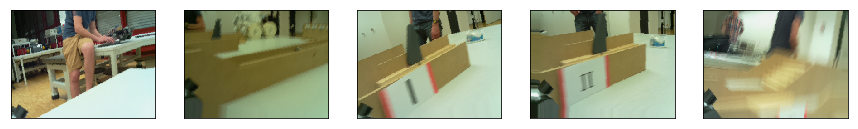

In [2]:
import matplotlib.pyplot as plt

stop = 1
plt.figure(figsize=(15, 6))
n = 5

for batch in train_generator:
    # display original
    ax = plt.subplot(2, n, stop)
    plt.imshow(batch[0][0])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    stop +=1
    if stop>5:
        break
plt.show()

# Create the model

- Model1: 8,16,32 96 nn
- Model2: 32, 64, 128, 128, 128 nn 68%

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv1', input_shape=(image_height, image_width, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv2',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block1_pool'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv1',))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv2',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block2_pool'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block3_conv1',))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block3_conv2',))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), name='block3_pool'))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128, name="dense1"))
model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 240, 320, 32)      896       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 240, 320, 32)      9248      
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 120, 160, 32)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 120, 160, 64)      18496     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 120, 160, 64)      36928     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 60, 80, 64)        0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 60, 80, 64)        36928     
__________

# Train the network

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=10)

Epoch 1/15
100/100 [==============================] - 345s - loss: 1.4674 - acc: 0.4039 - val_loss: 1.2298 - val_acc: 0.4667
Epoch 2/15
100/100 [==============================] - 333s - loss: 1.1602 - acc: 0.4947 - val_loss: 1.1626 - val_acc: 0.5667
Epoch 3/15
100/100 [==============================] - 337s - loss: 1.0409 - acc: 0.5431 - val_loss: 1.3002 - val_acc: 0.5167
Epoch 4/15
100/100 [==============================] - 332s - loss: 0.9103 - acc: 0.6017 - val_loss: 1.1299 - val_acc: 0.5833
Epoch 5/15
100/100 [==============================] - 334s - loss: 0.8043 - acc: 0.6398 - val_loss: 1.6120 - val_acc: 0.5667
Epoch 6/15
100/100 [==============================] - 329s - loss: 0.7129 - acc: 0.6836 - val_loss: 2.0038 - val_acc: 0.5333
Epoch 7/15
100/100 [==============================] - 333s - loss: 0.6460 - acc: 0.7138 - val_loss: 1.8301 - val_acc: 0.6167
Epoch 8/15
100/100 [==============================] - 332s - loss: 0.5936 - acc: 0.7407 - val_loss: 1.8015 - val_acc: 0.6500


In [10]:
model.save_weights('/output/ciffer_final.h5')

# Test the network with unknown data

In [13]:
test_generator = test_datagen.flow_from_directory(
        '/input/test',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 133 images belonging to 6 classes.


In [14]:
model.evaluate_generator(
        test_generator,
        steps=100)

[2.4694511612036698, 0.63909774489196625]